<a href="https://colab.research.google.com/github/CaioMonsorez/MLCriptomoedaSolana/blob/main/ML_Cripto_Solana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**UTILIZAÇÃO DE REDES NEURAIS RECORRENTES (RNN) PARA PREDIÇÃO DE PREÇO DE AÇÕES DA CRIPTOMOEDA SOLANA**

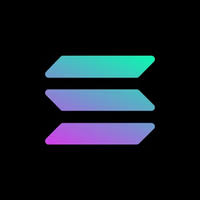


A Solana é uma moeda digital descentralizada, que surgiu com a finalidade de substituir os 
meios de pagamento atuais, porém ele enfrenta grandes desconfianças dos investidores e usuários
devido à volatilidade de seus valores. Uma forma de mitigar essa volatilidade é aplicar inteligência
computacional baseada em algoritmos de aprendizado de máquina, com o intuito de predizer
os valores de sua cotação. Este trabalho busca aplicar uma Rede Neural Recorrente (RNN)
utilizando-se da série histórica da Solana para realizar a predição da curva relativa ao valor
de fechamento diário. Para realizar o treinamento do algoritmo, foi utilizada a base de dados
Investing.com. Os dados utilizados são relativos à paridade SOLUSD no
período de 01/01/2021 até 08/09/2021. Diversos indicadores foram avaliados e combinados para
verificar a qualidade da geração do modelo, porém o melhor resultado obtido utilizou apenas
o indicador de curva (valor de fechamento diário) com uma raiz quadrada do erro quadrático
médio (do Inglês root mean square error - RMSE) de 260.137, sendo esse valor um parâmetro
para pesquisas futuras


**Importando a Base de dados extraída da investing.com**

In [ ]:
import pandas as pd
import numpy as np
import math

bd = pd.read_csv('Solana1.csv')

bd.head()

FileNotFoundError: ignored

**#Alterando nome da coluna "Ultimo" para "Fechamento"**




In [ ]:
#Alterando nome da coluna "Ultimo" para "Fechamento"
bd = bd.rename(columns={'Último': 'Fechamento'})

#ler novamente o bd com o nome da coluna "Fechamento" incluído
bd.head()

NameError: ignored

**Verificando os tipos de dados de cada coluna**

In [ ]:
# Verificando os tipos de dados de cada coluna

bd.dtypes

In [ ]:
bd.describe()

**Os dados estão em String. Vamos alterar para Float e Data**



In [ ]:
#bd['Data'] = pd.to_datetime(bd['Data']).dt.date #alterando a string para formato datatime
#bd['Fechamento'] = bd['Fechamento'].astype(float)#alterando o tipo de dados de string para float
#bd['Abertura'] = bd['Abertura'].str.replace(',','.') #substituindo a , pelo .
#bd['Abertura'] = bd['Abertura'].astype(float)#alterando o tipo de dados de string para float
#bd['Máxima'] = bd['Máxima'].str.replace(',','.') #substituindo a , pelo .
#bd['Máxima'] = bd['Máxima'].astype(float)#alterando o tipo de dados de string para float
#bd['Mínima'] = bd['Mínima'].str.replace(',','.') #substituindo a , pelo .
#bd['Mínima'] = bd['Mínima'].astype(float)#alterando o tipo de dados de string para float

**Incluindo a coluna "DATA" como Index da tabela**


In [ ]:
bd = bd.set_index('Data')

#retirando os valores nulos da tabela
bd=bd.dropna()

#verificando as alterações
bd.head()


In [ ]:
#Criando um gráfico dinamico
#No gráfico é possível filtrar pela legenda a informação
#Utilizar zoons


#Importar as bibliotecas para criar um dashboard
import plotly.graph_objects as Dash

#definindo uma figura
Figura=Dash.Figure()

#Incluindo eixo no gráfico (ABERTURA)

Figura.add_trace(Dash.Scatter(x=bd.index, y=bd.Abertura, 
                              mode='lines', 
                              name='Abertura', 
                              marker_color='#ff7f0e', 
                              visible = "legendonly"))

#Incluindo eixo no gráfico (Máxima)
Figura.add_trace(Dash.Scatter(x=bd.index, y=bd.Máxima, 
                              mode='lines', 
                              name='Máxima', 
                              marker_color='#2CA02C', 
                              visible = "legendonly"))

#Incluindo eixo no gráfico (Minima)
Figura.add_trace(Dash.Scatter(x=bd.index, y=bd.Mínima, 
                              mode='lines', 
                              name='Mínima', 
                              marker_color='#D62728', 
                              visible = "legendonly"))

#Incluindo eixo no gráfico (Fechamento)
Figura.add_trace(Dash.Scatter(x=bd.index, y=bd.Fechamento, 
                              mode='lines', 
                              name='Fechamento', 
                              marker_color='#17FFB4', 
                              visible = "legendonly"))

#Modificando o layout do gráfico
Figura.update_layout(
    title='Histórico de Preço',#Titulo
    titlefont_size =28, #Tamanho da fonte
    
    #parametros para mexer no eixo X
      xaxis=dict(
        title='Preço Histórico', #Titulo do eixo X
        titlefont_size = 16, #Tamanho da fonte do título
        tickfont_size = 14), #Tamanho da fonte do eixo 
    
    #parametros para mexer no eixo Y
      yaxis=dict(
        title='Preço em Dólar', #Titulo do eixo Y
        titlefont_size = 16, #Tamanho da fonte do título
        tickfont_size = 14), #Tamanho da fonte do eixo 

        #parametros para mexer na legenda
        legend=dict(
            y=1, x=1, #posição da legenda
            bgcolor='rgb(255,255,255,0)',#cor do fundo
            bordercolor= 'rgb(255,255,255,0)'))  #cor da borda     

Figura.show()




In [ ]:
bd.dtypes

**Ajustando a base de dados para o modelo**

In [ ]:
#Filtrando os dados de Fechamento
Dados_Fechamento = bd.filter(['Fechamento'])

#Filtrando apenas os valores
Dados_Fechamento_Valores = Dados_Fechamento.values

#Arredondando o número para cima usando 'Math.Ceil'
Dados_Fechamento_Valores_Tamanho = math.ceil(len(Dados_Fechamento_Valores)* .8)

Dados_Fechamento_Valores_Tamanho

**Aplicando Escalonamento nos Dados**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#aplicando escalonamento nos dados
#Definindo os parametros para a funçao escalonamento
Funcao_Escalonamento_01 = MinMaxScaler()

Dados_Escalonados_Fechamento = Funcao_Escalonamento_01.fit_transform(Dados_Fechamento_Valores)

Dados_Escalonados_Fechamento

**Definindo os dados de Treinameto**

In [ ]:
Dados_treino = Dados_Escalonados_Fechamento


#Lista para receber os dados
x_treinamento = []
y_treinamento = []

#Loop para separar os dados de treino e teste
#Nesse loop vamos separar os dados em bloco de 60 valores
for Loop in range (60, len(Dados_treino)):

  #Separando os dados de treinamento x
  Filtro_Amostra_Treinamento_x = Dados_treino[Loop-60:Loop,0]
  x_treinamento.append(Filtro_Amostra_Treinamento_x)

  #Separando os dados de treinamento y
  Filtro_Amostra_Treinamento_y = Dados_treino[Loop,0]
  y_treinamento.append(Filtro_Amostra_Treinamento_y)

**#Transformando as listas em ARRAY**

In [ ]:
#Transformando as listas em ARRAY
x_treinamento, y_treinamento =np.array(x_treinamento), np.array(y_treinamento)

#Convertendo array para matriz

x_treinamento = np.reshape(x_treinamento,(x_treinamento.shape[0], x_treinamento.shape[1], 1))

#Verificação da demisao da Matriz

x_treinamento.shape

**Vamos treinar nosso modelo com o Keras**

O Gradient Descent é a função usada para minimização do erro dos pesos do modelo

Os erros são calculados usando técnicas como Mean Squared Error.

In [ ]:
# Importando as libs responsáveis pelo treinamento do Keras
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Definindo a função do keras
#Essa função é uma pilha linear de camadas do keras
Modelo = Sequential()

#Adicionando camadas e parametros para  nossa rede neural
#Treinamento da rede neural recorrente

#LSTM - Long Short Term - Memory
Modelo.add(LSTM(50, return_sequences = True,
                input_shape = (x_treinamento.shape[1], 1)))
Modelo.add(LSTM(50, return_sequences= False))

#Adicionando as camadas na rede neural
Modelo.add(Dense(25))
Modelo.add(Dense(1))
Modelo.compile(optimizer = 'adam', loss = 'mean_squared_error')

#Treinando o modelo
Modelo.fit(x_treinamento, y_treinamento, batch_size = 1, epochs = 1)








In [ ]:
# Definindo amostra para ser testada
Dados_Teste = Dados_Escalonados_Fechamento[Dados_Fechamento_Valores_Tamanho - 60: , :]
# Lista para recever os dados de teste
x_teste = []
# Lista com os dados de teste
y_Teste = Dados_Fechamento_Valores[Dados_Fechamento_Valores_Tamanho:, :]

# Loop para fixar amostra para teste
for Loop in range (60, len(Dados_Teste)):
    x_teste.append(Dados_Teste[Loop - 60:Loop, 0])

# Transformando os dados em um array
x_teste = np.array(x_teste)
# Convertendo o array para Matriz
x_teste = np.reshape(x_teste, (x_teste.shape[0], x_teste.shape[1], 1))

# Aplicando as Previsões
Previsoes = Modelo.predict(x_teste)
# Invertendo para escalas reais 
Previsoes = Funcao_Escalonamento_01.inverse_transform(Previsoes)

# Calculando o erro quadrático médio
rsme = np.sqrt(np.mean(Previsoes - y_Teste) ** 2)
print('Erro Quadrático Médio:', rsme )

In [ ]:
# Criando a base para verificar o real x modelo
Validação = Dados_Fechamento[Dados_Fechamento_Valores_Tamanho:]

# Atribuindo as previsões no DataSet
Validação['Previsões'] = Previsoes

In [ ]:
# Verificando o real vs modelo
Validação[['Fechamento','Previsões']].head(60)

In [ ]:
# Criando um Gráfico Dinâmico
# No gráfico é possivel filtrar pela legenda a informação
# Utlizar zoons

# Definindo uma figura
Figura = Dash.Figure()

# Incluindo o Eixo no Gráfico - Fechamento
Figura.add_trace(Dash.Scatter(x = Validação.index, y = Validação.Fechamento, 
                    mode='lines',
                    name='Fechamento',
                    marker_color = '#FF7F0E',
                    ))

# Incluindo o Eixo no Gráfico - Previsão
Figura.add_trace(Dash.Scatter(x = Validação.index, y = Validação.Previsões,
                    mode='lines',
                    name='Previsão',
                    marker_color = '#2CA02C',
                    ))

# Modificando o Layout do Gráfico
Figura.update_layout(
    title='Realizado vs Modelo de Previsão Solana', # Titulo
    titlefont_size = 28, # Tamanho da Fonte
    
    # Parametros para mexer no eixo X
    xaxis = dict( 
        title='Período Histórico', # Titulo do Eixo x
        titlefont_size=16, # Tamanho fonte do Titulo 
        tickfont_size=14), # Tamanho da fonte do eixo 

    # Tamanho do Grafico
    height = 500, 
    
    # Parametros para mexer no eixo y
    yaxis=dict(
        title='Preço em Dólar', # Titulo do Eixo y
        titlefont_size=16, # Tamanho fonte do Titulo 
        tickfont_size=14), # Tamanho da fonte do eixo 
    
    # Parametros para mexer na legenda
    legend=dict(
        y=1, x=1, # Posição da Legenda
        bgcolor='rgba(255, 255, 255, 0)', # Cor de fundo
        bordercolor='rgba(255, 255, 255, 0)')) # Cor da Bornda

# Mostrando o Gráfico
Figura.show()